# solution refer 

https://github.com/covuworie/learning-from-data/blob/master/Solutions/hw1_soln_code.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
def randomPoint(lower, upper, dim): 
    X = np.random.uniform(lower, upper, dim)
    return X

In [3]:
def getLabel(point_1, point_2, random_point):
    """
    You can search how to know the point being above or being below the line. (trick)
    int. +1 for the point being above the line. -1 for the point being below the line. 0 otherwise.
    Check further infor: https://stackoverflow.com/questions/3838319/how-can-i-check-if-a-point-is-below-a-line-or-not
                       or https://math.stackexchange.com/questions/274712/calculate-on-which-side-of-a-straight-line-is-a-given-point-located.
    You need to draw in the white broad to see why ?
    """
    if point_1[0] < point_2[0]:
        minus_of_point_of_line = (point_1[0]-point_2[0], point_1[1]-point_2[1])
    else: minus_of_point_of_line = (point_2[0]-point_1[0], point_2[1]-point_1[1])
    
    if point_1[1] < point_2[1]:
         minus_of_randomPoint_and_point = (random_point[0] - point_1[0], random_point[1]-point_1[1])
    else:  minus_of_randomPoint_and_point = (random_point[0] - point_2[0], random_point[1]-point_2[1])
    
    return np.sign( minus_of_point_of_line[1]*minus_of_randomPoint_and_point[0] -
                  minus_of_point_of_line[0]*minus_of_randomPoint_and_point[1])
    

In [4]:
def generate_X(N):
    # Create X train 
    X = [randomPoint(-1, 1, 2) for i in range(0, N)]
    X = np.array(X) # shape(N, 2)
    
    return X
    
    

In [5]:
def corresponding_Y(X):
    # random 2 point for the line seperately data and get label corresponding
    point_1_OfLine = randomPoint(-1, 1, 2) #shape (1, 2)
    point_2_OfLine = randomPoint(-1, 1, 2)
    
    # -1 for the point being above the line. -1 for the point being below the line. 0 otherwise.
    y = [getLabel(point_1_OfLine, point_2_OfLine, x) for x in X]
    y = np.array(y)
    return y
    

In [6]:
# làm như vậy để phù hợp với bài toán này thôi ở phần mà chia train set và test set
def train_test_split(X, y, n_points):
    n = X.shape[0]
    index = np.arange(n)
    np.random.shuffle(index) # random index
#     number_of_element_train = int(np.round(0.2*n)) # get 20% of data
    #print(number_of_element_train)
    # train
    X_train = X[index[:n_points], :]
    X_test = X[index[n_points:], :]
    # test
    y_train = y[index[:n_points]]
    y_test = y[index[n_points:]]
    
    return X_train, X_test, y_train, y_test

In [7]:
class PLA:
    """Perceptron learning algorithm (PLA) class"""
    def __init__(self, initialWeights, trainingSet, y):
        """Create a new perceptron learning algorithm (PLA)
        Args:
        
        """
        self.initialWeights = initialWeights
        self.trainingSet = trainingSet
        self.y = y
    
    def  predict(self, w):
        return np.sign(self.trainingSet.dot(w))
    
    def run(self, maxIterations = 10000):
        """Run perceptron learning algorithm """
        w = self.initialWeights
        X = self.trainingSet
        y = self.y
        
        converged = False
        
        for i in range(0, maxIterations):
            pred = self.predict(w)
            #find the index of misclassifier points
            mis_indexs = np.where(np.equal(pred, y)==False)[0]
            # number of misclassifier points
            num_mis = mis_indexs.shape[0]
            #print(num_mis)
            
            if num_mis == 0:# no more misclassifier point
                converged = True
                return w, i
                
            # random pick one misclassifier points
            random_id = np.random.choice(mis_indexs, 1)[0]
            #update w
            w = w + y[random_id] * X[random_id]
            
        if converged == False:
            print("Perceptron algorithm failed to converge after maximum number of iterations")
            
        

In [8]:
# Sáng mai tính tiếp hàm loop cho PLA
def runPerceptron(n_loops=100, n_points = 10):
    sumOfIteration = 0
    sumDisagreementProb = 0
    
    print(n_loops)

    for i in range(n_loops):
        X = generate_X(n_points + 1000) # 1000 for test set
        y = corresponding_Y(X) # get labels correspondingly

        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, n_points)

        w0 = np.zeros(X.shape[1])
        pla = PLA(w0, X_train, y_train)
        #run PLA
        w_converged, iterations = pla.run()
        print("PLA converged after %d iterations ", iterations)
        
        # update the number of iterations
        sumOfIteration += iterations

        # calculate the probability of the disagreement between f and g which is P[f(x) != g(x)] 
        y_predict = np.sign(X_test.dot(w_converged))
        mis_indexs = np.where(np.equal(y_predict, y_test)==False)[0] # the number of the disagreement between f and g
        num_mis = mis_indexs.shape[0]
        sumDisagreementProb += float(num_mis/X_test.shape[0])


    mean_disagreementProb = sumDisagreementProb / n_loops
    mean_iterations = sumOfIteration /n_loops
    
    return mean_iterations, mean_disagreementProb

    print("The average number of iterations = ", mean_iterations)
    print("the average disagreement probability between f and g = ", mean_disagreementProb)
    
    

In [9]:
mean_iterations, mean_disagreementProb = runPerceptron(n_loops = 1000, n_points = 10)

print("----------------------------------")
print("The average number of iterations = ", mean_iterations)
print("the average disagreement probability between f and g = ", mean_disagreementProb)

1000
PLA converged after %d iterations  5
PLA converged after %d iterations  2
PLA converged after %d iterations  5
PLA converged after %d iterations  37
PLA converged after %d iterations  5
PLA converged after %d iterations  1
PLA converged after %d iterations  2
PLA converged after %d iterations  7
PLA converged after %d iterations  11
PLA converged after %d iterations  18
PLA converged after %d iterations  4
PLA converged after %d iterations  13
PLA converged after %d iterations  10
PLA converged after %d iterations  8
PLA converged after %d iterations  15
PLA converged after %d iterations  44
PLA converged after %d iterations  39
PLA converged after %d iterations  23
PLA converged after %d iterations  9
PLA converged after %d iterations  2
PLA converged after %d iterations  10
PLA converged after %d iterations  11
PLA converged after %d iterations  273
PLA converged after %d iterations  2
PLA converged after %d iterations  11
PLA converged after %d iterations  13
PLA converged afte

PLA converged after %d iterations  9
PLA converged after %d iterations  5
PLA converged after %d iterations  10
PLA converged after %d iterations  4
PLA converged after %d iterations  43
PLA converged after %d iterations  3
PLA converged after %d iterations  2
PLA converged after %d iterations  3
PLA converged after %d iterations  5
PLA converged after %d iterations  1
PLA converged after %d iterations  18
PLA converged after %d iterations  15
PLA converged after %d iterations  9
PLA converged after %d iterations  5
PLA converged after %d iterations  6
PLA converged after %d iterations  3
PLA converged after %d iterations  13
PLA converged after %d iterations  7
PLA converged after %d iterations  195
PLA converged after %d iterations  4
PLA converged after %d iterations  2
PLA converged after %d iterations  25
PLA converged after %d iterations  11
PLA converged after %d iterations  24
PLA converged after %d iterations  9
PLA converged after %d iterations  32
PLA converged after %d iter

PLA converged after %d iterations  5
PLA converged after %d iterations  20
PLA converged after %d iterations  29
PLA converged after %d iterations  3
PLA converged after %d iterations  11
PLA converged after %d iterations  7
PLA converged after %d iterations  12
PLA converged after %d iterations  3
PLA converged after %d iterations  32
PLA converged after %d iterations  6
PLA converged after %d iterations  5
PLA converged after %d iterations  13
PLA converged after %d iterations  2
PLA converged after %d iterations  6
PLA converged after %d iterations  3
PLA converged after %d iterations  5
PLA converged after %d iterations  1
PLA converged after %d iterations  2
PLA converged after %d iterations  12
PLA converged after %d iterations  1
PLA converged after %d iterations  32
PLA converged after %d iterations  4
PLA converged after %d iterations  3
PLA converged after %d iterations  53
PLA converged after %d iterations  5
PLA converged after %d iterations  42
PLA converged after %d itera

PLA converged after %d iterations  33
PLA converged after %d iterations  2
PLA converged after %d iterations  11
PLA converged after %d iterations  23
PLA converged after %d iterations  12
PLA converged after %d iterations  4
PLA converged after %d iterations  3
PLA converged after %d iterations  6
PLA converged after %d iterations  11
PLA converged after %d iterations  3
PLA converged after %d iterations  9
PLA converged after %d iterations  4
PLA converged after %d iterations  1
PLA converged after %d iterations  1
PLA converged after %d iterations  7
PLA converged after %d iterations  19
PLA converged after %d iterations  2
PLA converged after %d iterations  4
PLA converged after %d iterations  5
PLA converged after %d iterations  5
PLA converged after %d iterations  2
PLA converged after %d iterations  5
PLA converged after %d iterations  10
PLA converged after %d iterations  22
PLA converged after %d iterations  5
PLA converged after %d iterations  10
PLA converged after %d iterat

PLA converged after %d iterations  1202
PLA converged after %d iterations  2
PLA converged after %d iterations  20
PLA converged after %d iterations  29
PLA converged after %d iterations  2
PLA converged after %d iterations  4
PLA converged after %d iterations  7
PLA converged after %d iterations  11
PLA converged after %d iterations  7
PLA converged after %d iterations  5
PLA converged after %d iterations  4
PLA converged after %d iterations  12
PLA converged after %d iterations  1
PLA converged after %d iterations  1
PLA converged after %d iterations  9
PLA converged after %d iterations  22
PLA converged after %d iterations  4
PLA converged after %d iterations  9
PLA converged after %d iterations  2
PLA converged after %d iterations  27
PLA converged after %d iterations  4
PLA converged after %d iterations  17
PLA converged after %d iterations  15
PLA converged after %d iterations  1
PLA converged after %d iterations  2
PLA converged after %d iterations  11
PLA converged after %d ite

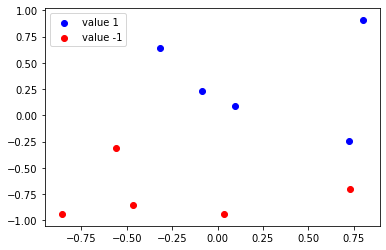

In [86]:
#draw to see
X_1 = X[y.T==1, :]
X_2 = X[y.T==-1, :]


plt.scatter(X_1[:, 0], X_1[:, 1], c="blue", label = "value 1")
plt.scatter(X_2[:, 0], X_2[:, 1], c="red", label = "value -1")
plt.legend()
plt.show()


# test thử 

In [340]:
X = generate_X(100)
y = corresponding_Y(X)
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
w0 = np.zeros(X.shape[1])


[56 27 64 75 60 39 72  3 51  7 70 31 80 35 88 24 91 58  9 17 37 44 22 28
 74 55 21 96 79 33 15 19 93  6 34 57 20 98 99 63 97 89 47 25 48 45 32 66
 81 42 61  8 84 29 23 41 11 71 36 73 68 86 46 18 94 77  0 49 76 26 53 16
 59 38 83 30 62 65 50 85  2  5 92 12 95 54 10 90 43  4 40 14 52 67 87 78
  1 69 13 82]


In [341]:
# chay thuat toan
pla = PLA(w0, X_train , y_train)
w_converged, iteration = pla.run()

20
11
5
7
1
3
3
2
3
2
3
2
3
2
5
1
3
1
3
1
1
0


In [356]:
iteration

21

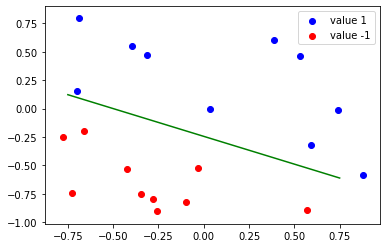

In [355]:
X_train1 = X_train[y_train==1, :]
X_train2 = X_train[y_train==-1, :]


plt.scatter(X_train1[:, 1], X_train1[:, 2], c="blue", label = "value 1")
plt.scatter(X_train2[:, 1], X_train2[:, 2], c="red", label = "value -1")
plt.plot((-0.75, 0.75), (-(-0.75*w_converged[1] + w_converged[0])/w_converged[2], -(0.75*w_converged[1] + w_converged[0])/w_converged[2]), 'g')
plt.legend()
plt.show()
